## **Lab 2 - Clustering Exercise**

In this exercise, we will apply our knowledge of clustering on the following dataset:

Dataset Link:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Clustering on this dataset will be done using KMeans, Hierarchal clustering and DBSCAN. Finding the optimal hypermaters for each and then choosing the best model among the three

Start by Importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset into a DataFrame

In [2]:
df = pd.read_csv('CC GENERAL.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df = df.fillna(0)

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df = pd.get_dummies(df)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

## K-Means

Find the optimal Kmeans model

In [8]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)

In [9]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

Choose the optimal K and calculate the silhouette score for the best model.

In [26]:
ssd = []
s=[]
best=-1
best_n=1

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_df)
    silhouette=silhouette_score(scaled_df,model.labels_)#,metric='euclidean')
    s.append(silhouette)
    if silhouette >= best:
        best_n=k
        best =silhouette 
        #best_affinity=affinity
        #best_linkage=linkage
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

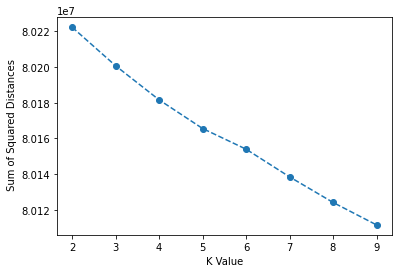

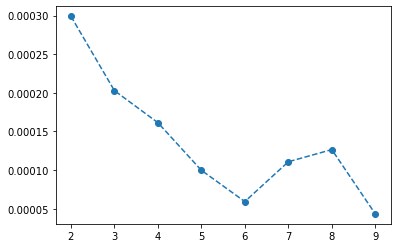

In [27]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")
plt.figure()
plt.plot(range(2,10),s,'o--')

In [28]:
print("Best score: ", best)
print("Best k: ", best_n)

Best score:  0.0002990933970752963
Best k:  2


## Agglomerative Clustering

Find the optimal agglomerative clustering model.

In [14]:
model = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage = "average")
cluster_labels = model.fit_predict(scaled_df)
score = silhouette_score(scaled_df, cluster_labels)
print(score)

0.03027293328292119


In [23]:
model = AgglomerativeClustering(n_clusters=2, affinity="manhattan", linkage = "average")
cluster_labels = model.fit_predict(scaled_df)
score = silhouette_score(scaled_df, cluster_labels)
print(score)

0.026827062033139136


Choose the optimal K and calculate the silhouette score for the best model.

## DBSCAN

Find the optimal DBSCAN model.

In [13]:
from sklearn.cluster import DBSCAN

Find the parameters that optimize the performance of your model and calculate the silhouette score.

In [ ]:
dbscan = DBSCAN(eps=2)
cluster_labels = dbscan.fit_predict(scaled_df)

In [ ]:
# Define a range for eps and min_samples
eps_range = np.linspace(200, 350, 20)  # Increase upper bound for better clustering
num_features = 36  # Given feature size
min_samples_range = [5, 7 , 9 , 2, 36]  # Adjusted min_samples to be around half of feature size

best_score = -1
best_eps = None
best_min_samples = None

# Loop through different values of eps and min_samples
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
        labels = dbscan.fit_predict(scaled_df)

        noise_ratio = (labels == -1).sum() / len(labels)  # Calculate noise percentage
        num_clusters = len(set(labels) - {-1})  # Exclude noise label (-1)

        print(f"eps: {eps:.2f}, min_samples: {min_samples}, Clusters: {num_clusters}, Noise: {noise_ratio:.2%}")

        # Only evaluate models with more than 1 cluster
        if num_clusters > 1:
            score = silhouette_score(scaled_df, labels)
            print(f"Silhouette Score: {score:.4f}")
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f'Best eps: {best_eps} with best min_samples: {best_min_samples} and silhouette score: {best_score}')

eps: 200.00, min_samples: 5, Clusters: 1, Noise: 0.00%
eps: 200.00, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 200.00, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 200.00, min_samples: 2, Clusters: 1, Noise: 0.00%
eps: 200.00, min_samples: 36, Clusters: 1, Noise: 0.00%
eps: 207.89, min_samples: 5, Clusters: 1, Noise: 0.00%
eps: 207.89, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 207.89, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 207.89, min_samples: 2, Clusters: 1, Noise: 0.00%
eps: 207.89, min_samples: 36, Clusters: 1, Noise: 0.00%
eps: 215.79, min_samples: 5, Clusters: 1, Noise: 0.00%
eps: 215.79, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 215.79, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 215.79, min_samples: 2, Clusters: 1, Noise: 0.00%
eps: 215.79, min_samples: 36, Clusters: 1, Noise: 0.00%
eps: 223.68, min_samples: 5, Clusters: 1, Noise: 0.00%
eps: 223.68, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 223.68, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 22

In [22]:
# Define a range for eps and min_samples
eps_range = np.linspace(133, 150, 10)  # Increase upper bound for better clustering
num_features = 36  # Given feature size
min_samples_range = [7 , 9]  # Adjusted min_samples to be around half of feature size

best_score = -1
best_eps = None
best_min_samples = None

# Loop through different values of eps and min_samples
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
        labels = dbscan.fit_predict(scaled_df)

        noise_ratio = (labels == -1).sum() / len(labels)  # Calculate noise percentage
        num_clusters = len(set(labels) - {-1})  # Exclude noise label (-1)

        print(f"eps: {eps:.2f}, min_samples: {min_samples}, Clusters: {num_clusters}, Noise: {noise_ratio:.2%}")

        # Only evaluate models with more than 1 cluster
        if num_clusters > 1:
            score = silhouette_score(scaled_df, labels)
            print(f"Silhouette Score: {score:.4f}")
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f'Best eps: {best_eps} with best min_samples: {best_min_samples} and silhouette score: {best_score}')

eps: 133.00, min_samples: 7, Clusters: 0, Noise: 100.00%
eps: 133.00, min_samples: 9, Clusters: 0, Noise: 100.00%
eps: 134.89, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 134.89, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 136.78, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 136.78, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 138.67, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 138.67, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 140.56, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 140.56, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 142.44, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 142.44, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 144.33, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 144.33, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 146.22, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 146.22, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 148.11, min_samples: 7, Clusters: 1, Noise: 0.00%
eps: 148.11, min_samples: 9, Clusters: 1, Noise: 0.00%
eps: 1

## Result Interpretation and Discussion

Which model was chosen? Why was it chosen and based on what?

In [ ]:
# 2 trials of agglomerative clustering were made as it takes too much time it gave the best ...
# silhouette of 0.03027293328292119 with parameters (euclidean, average, n_clusters = 2)
# K-means suggested that 2 clusters is the best division however the silhouette score was ...
# too small ~ 0.003 which makes it a bad clustering choice
# DBScan was not able to cluster the data into more than 1 cluster.
# Best algorithm was agglomerative